In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.2)
import scipy.signal

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/MV/present"

In [3]:
waves = np.load(path + "/present_MV_waves_10sec.npy", allow_pickle= True)

In [4]:
n = waves.shape[0]

## Scaled Autocorrelation Peaks

In [5]:
def scale(data):
    maxx = data.max()
    minn = data.min()
    
    diff = maxx - minn
    scaled = np.empty((data.shape[0]))
    
    for i in range(data.shape[0]):
        scaled[i] = (data[i] - minn )/ diff
    return scaled

In [6]:
from scipy import signal
from scipy.signal import find_peaks

In [7]:
autocorr = signal.fftconvolve(waves[0], waves[0], mode='same')

In [8]:
autocorr_norm = scale(autocorr)

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_8033/2127519553.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


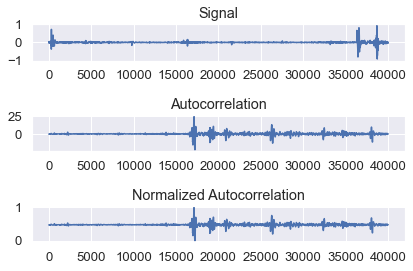

In [9]:
import matplotlib.pyplot as plt
>>> fig, (ax_orig, ax_mag, ax_norm) = plt.subplots(3, 1)
>>> ax_orig.plot(waves[0])
>>> ax_orig.set_title('Signal')
>>> ax_mag.plot(np.arange(0,len(waves[0])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> ax_norm.plot(np.arange(0,len(waves[0])), autocorr_norm)
>>> ax_norm.set_title('Normalized Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

In [10]:
peaks = find_peaks(autocorr_norm, height = 0.7)

In [11]:
peaks[0].shape[0]

3

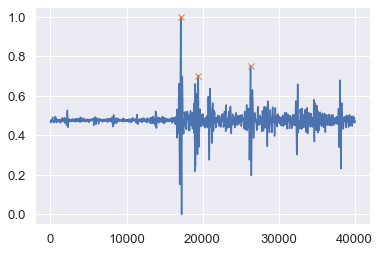

In [12]:
>>> plt.plot( autocorr_norm)
>>> plt.plot(peaks[0], autocorr_norm[peaks[0]], "x")
>>> plt.show()

In [13]:
peaks_sum = np.empty((n))
for i in range(waves.shape[0]):
    auto_corr = signal.fftconvolve(waves[i], waves[i], mode='same')
    norm = scale(auto_corr)
    peaks_sum[i] = find_peaks(norm, height = 0.7)[0].shape[0]

In [14]:
peaks_sum

array([  3.,   9.,  31., ...,  63., 102.,  36.])

## create dataframe

In [15]:
import pandas as pd

In [16]:
peak_df = pd.DataFrame(peaks_sum, columns =["ac num of peaks"])
peak_df.head()

,ac num of peaks
0,3.0
1,9.0
2,31.0
3,5.0
4,150.0


In [17]:
peak_df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/MV/present/MV-max-min-normalized-peaks.csv" )